In [1]:
import os
WM_PROJECT_USER_DIR=os.environ['WM_PROJECT_USER_DIR']
import sys 
sys.path.append(f"{WM_PROJECT_USER_DIR}/utilities")
import numpy as np
import pandas as pd
import postProcess.polyMesh2d as mesh2d
import postProcess.pyResconstruct as pyResconstruct
import postProcess.pyFigure as pyFigure
import postProcess.pyCompute as pyCompute
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import json
import proplot as plot
import concurrent.futures

data_folder=os.path.abspath('../postProcess')
save_folder=os.path.abspath('../postProcess/images')
transverse_data_folder=os.path.abspath("../postProcess/transverseAveragedData/")

%load_ext autoreload
%autoreload 2


## Case Setting

In [2]:
Pe=1e-2
pixelResolution=0.5e-6
DO2=6.20322E-06
w = 30e-6
U_0   = Pe*DO2/w
rhof =4.4890
rhoST= 1.2758
print(f"average inlet velocity: {U_0} m/s")
print(f"air flux: {U_0*60} m3/(m2 min) ")
print(f"air flux at ST: {U_0*60*rhof/rhoST} m3/(m2 min) ")

print(f"air flux at ST: {U_0*60*60*rhof/rhoST} m3/(m2 h) ")

print("---- air flux reference----")
print(f"reference air flux of CT experiments in LiuDong paper:0.24~1.90 m3/(m2 min)  ")
print(f"recommended min flux by Burger (Moore, 1999): 0.005~0.0133 m3 (ST)/(m2.min)")
print(f"usual air flux of CT expermients (Moore, 1999) : 0.486 m3 (ST)/(m2.min)")
print(f"Lloydminster type heavy oil min air flux (Moore, 1999): 0.0468 m3 (ST)/(m2.min) [(450 m3(ST)/m3), cf rate: 0.15m/d] ")
print(f"relatively light oil min air flux (Moore, 1999): 0.0156 m3 (ST)/(m2.min) [(150 m3(ST)/m3), cf rate: 0.15m/d] ")

print("---- combustion front velocity----")
print("reference cf rate (Moore, 1999): 0.15 m/d=> 1.73 um/s => pass 680um need about 386s")



average inlet velocity: 0.0020677399999999998 m/s
air flux: 0.12406439999999999 m3/(m2 min) 
air flux at ST: 0.4365300921774572 m3/(m2 min) 
air flux at ST: 26.191805530647432 m3/(m2 h) 
---- air flux reference----
reference air flux of CT experiments in LiuDong paper:0.24~1.90 m3/(m2 min)  
recommended min flux by Burger (Moore, 1999): 0.005~0.0133 m3 (ST)/(m2.min)
usual air flux of CT expermients (Moore, 1999) : 0.486 m3 (ST)/(m2.min)
Lloydminster type heavy oil min air flux (Moore, 1999): 0.0468 m3 (ST)/(m2.min) [(450 m3(ST)/m3), cf rate: 0.15m/d] 
relatively light oil min air flux (Moore, 1999): 0.0156 m3 (ST)/(m2.min) [(150 m3(ST)/m3), cf rate: 0.15m/d] 
---- combustion front velocity----
reference cf rate (Moore, 1999): 0.15 m/d=> 1.73 um/s => pass 680um need about 386s


### Comments
air flux is comparable to the CT conditions

## Min/Max fields

In [3]:
file_path="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T673_Pe1e-2/postProcessing/minMaxComponents2/12.01/fieldMinMax.dat"
Ufile_path="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T673_Pe1e-2/postProcessing/minMaxMagnitude/12.01/fieldMinMax.dat"
sampling_rate=1

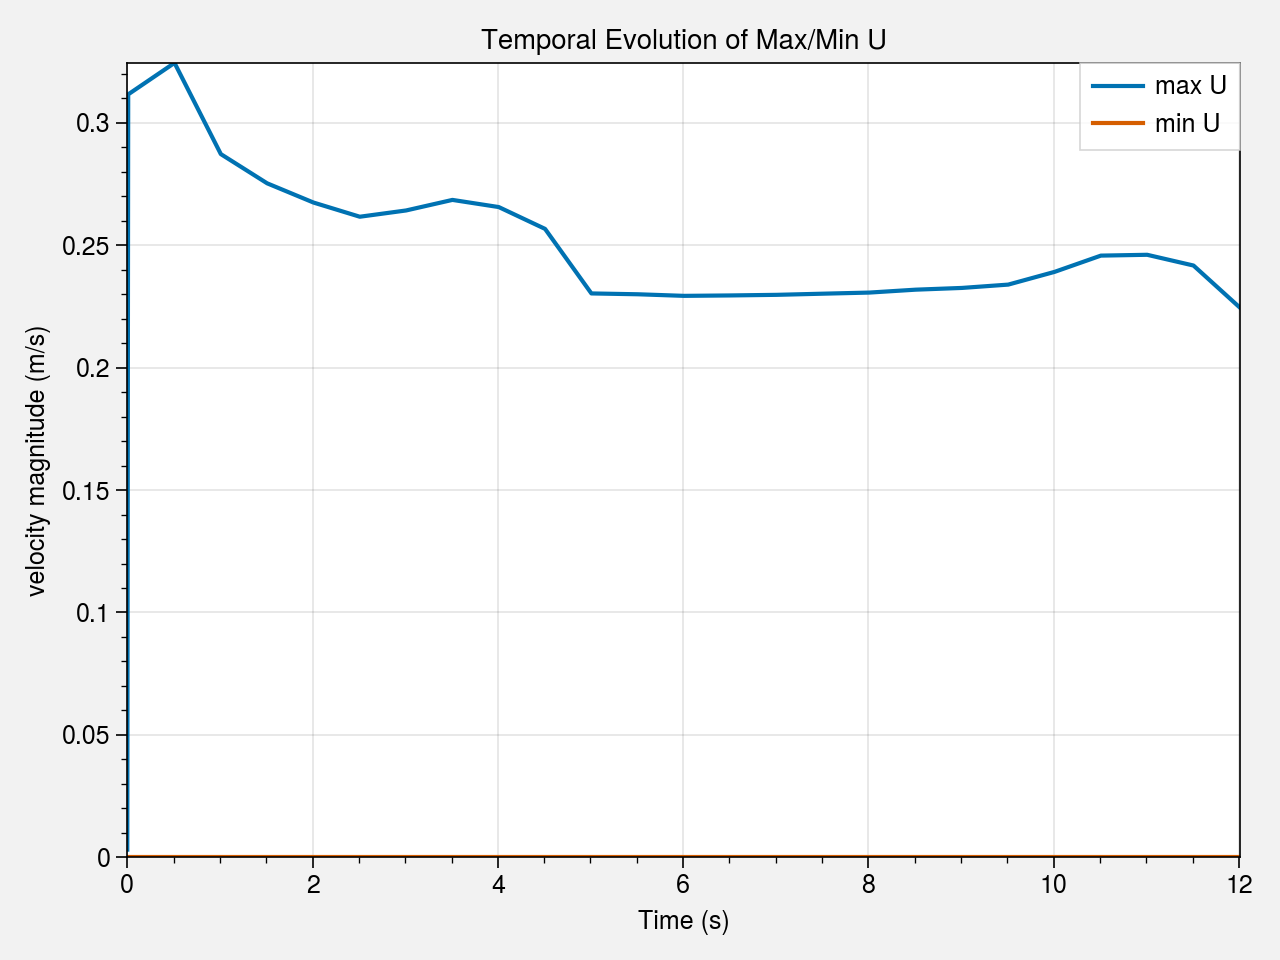

In [4]:
fig,ax,_=pyFigure.plot_min_max_field(Ufile_path,sampling_rate,"U","velocity magnitude (m/s)")

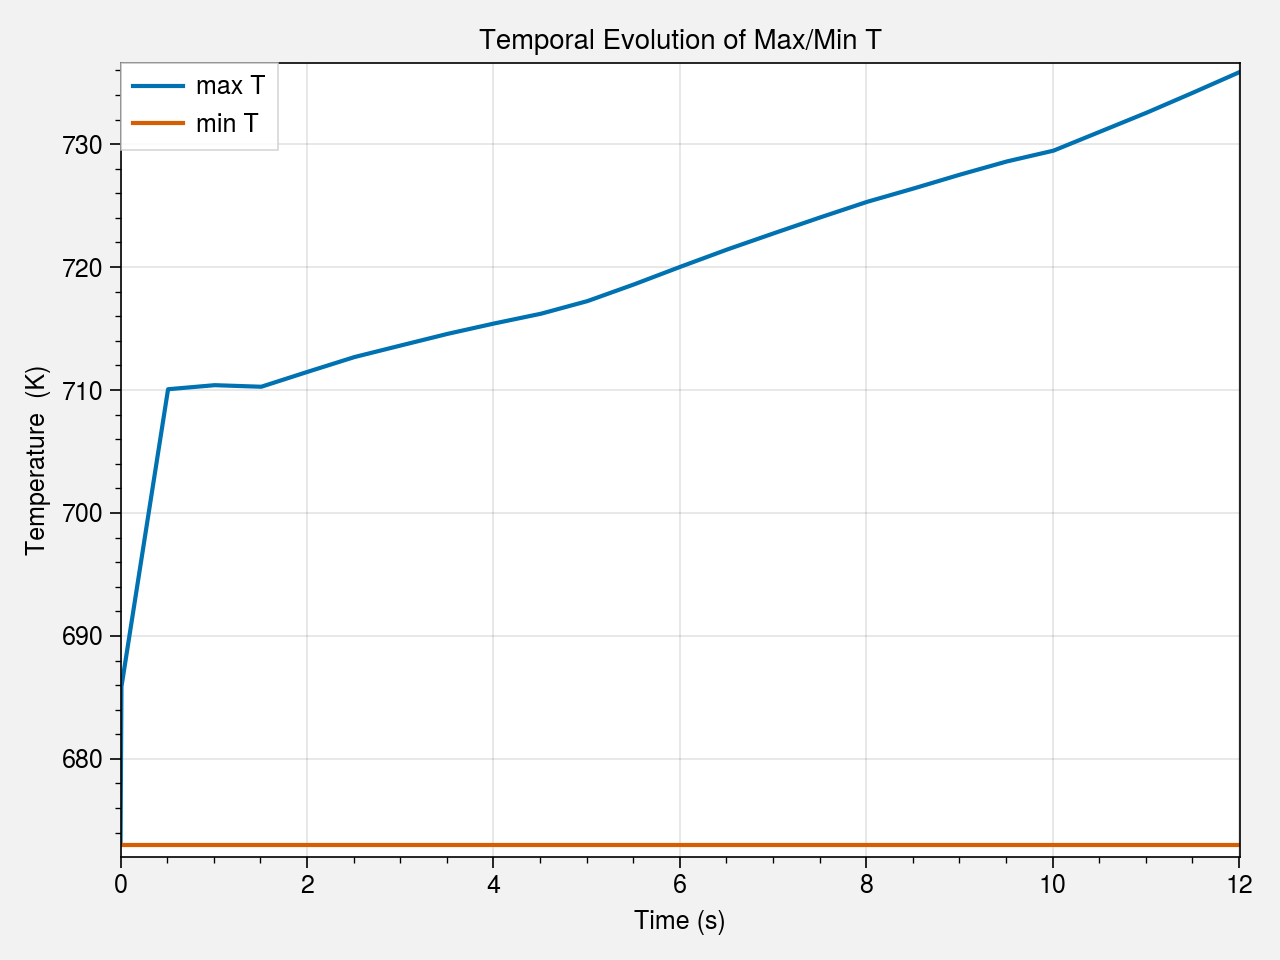

In [5]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"T","Temperature  (K)")
ax.set_ylim([672,ax.get_ylim()[1]*1.001])
fig.tight_layout()

(1000000000.0, 20000000000.0)

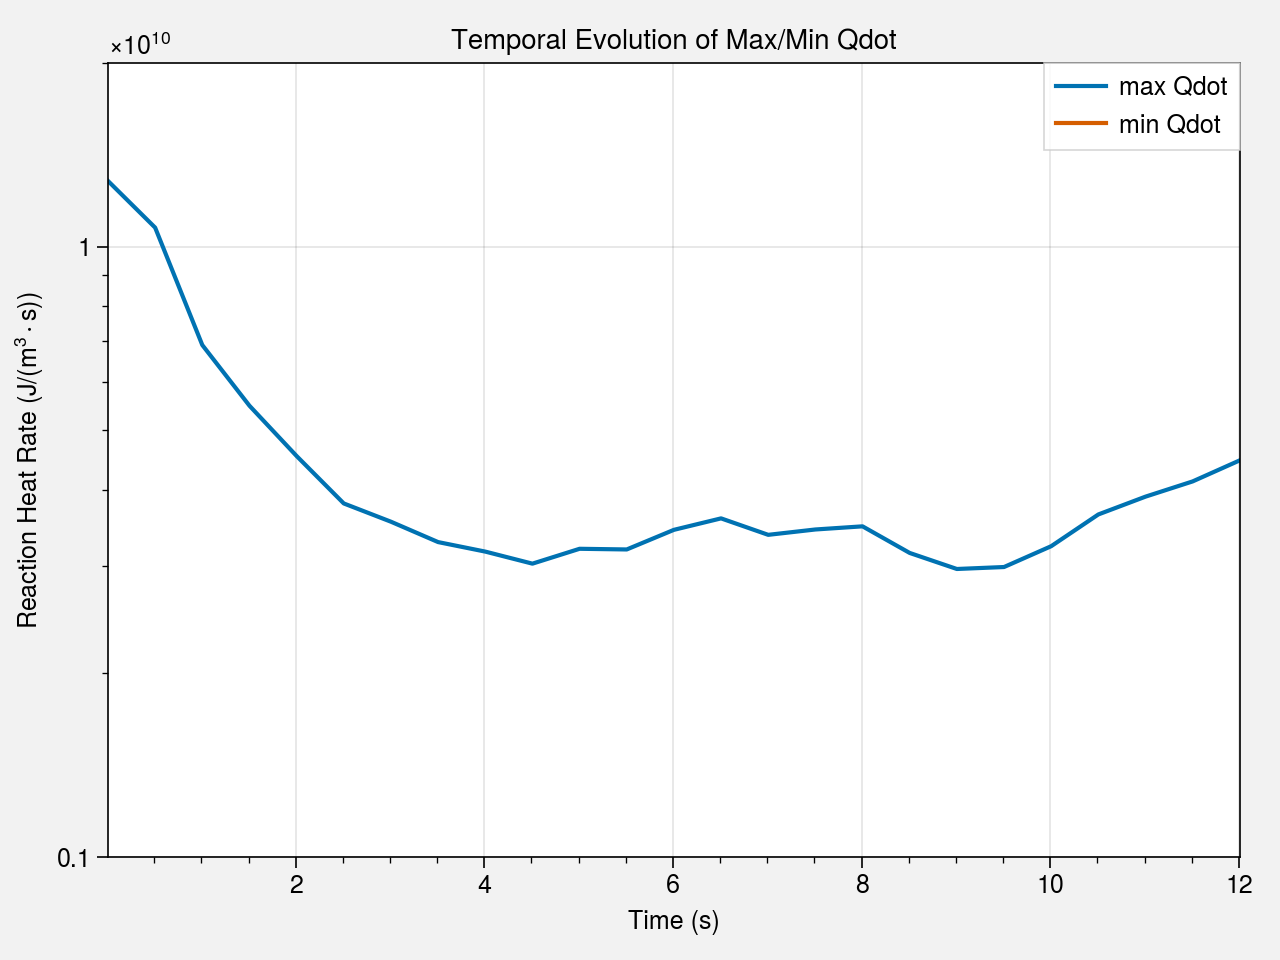

In [6]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"Qdot","Reaction Heat Rate (J/(m$^3\cdot$s))","log")
# ax.set_xlim([0.1,8.2])
ax.set_ylim([1e9,2e10])

## Trasversly averaged fields

In [7]:
# workerNum=8
# compute_data_folder=os.path.abspath("../postProcess/transverseAveragedData/")
# pyCompute.batchComputeTransverselyAverages(data_folder,compute_data_folder)

# # script="/home/anoldfriend/OpenFOAM/anoldfriend-7/utilities/postProcess/pyCompute.py"
# # cmd = f"python {script} -d {data_folder} -s {compute_data_folder} -t all -n {workerNum} "
# # print(cmd)
# # os.system(cmd)

In [8]:
pyFigure.get_times_from_data_folder(transverse_data_folder)

array(['0.01', '0.51', '1.01', '1.51', '10.01', '10.51', '11.01', '11.51',
       '12.01', '2.01', '2.51', '3.01', '3.51', '4.01', '4.51', '5.01',
       '5.51', '6.01', '6.51', '7.01', '7.51', '8.01', '8.51', '9.01',
       '9.51'], dtype='<U5')

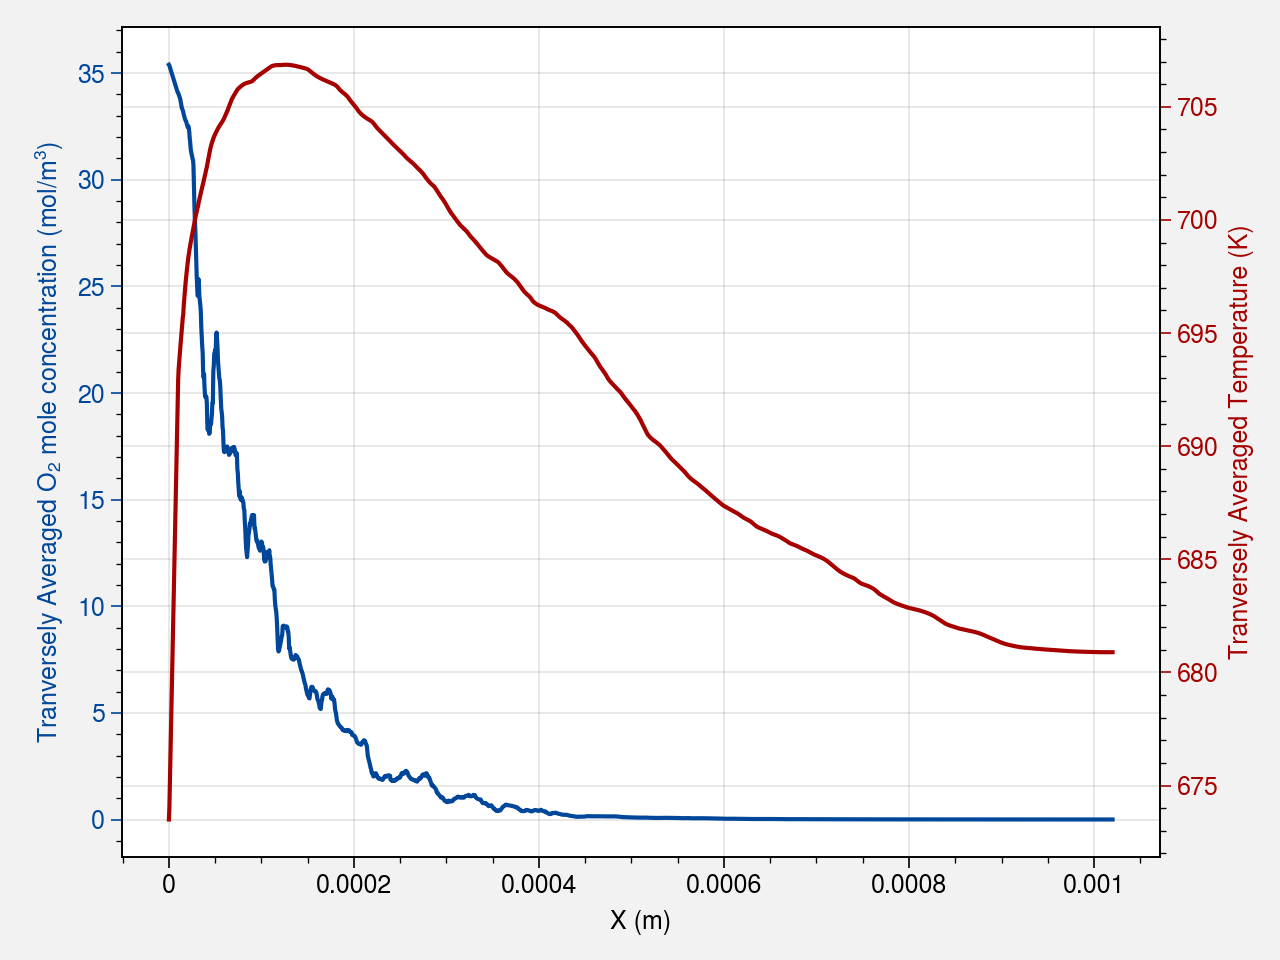

In [9]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"0.51")

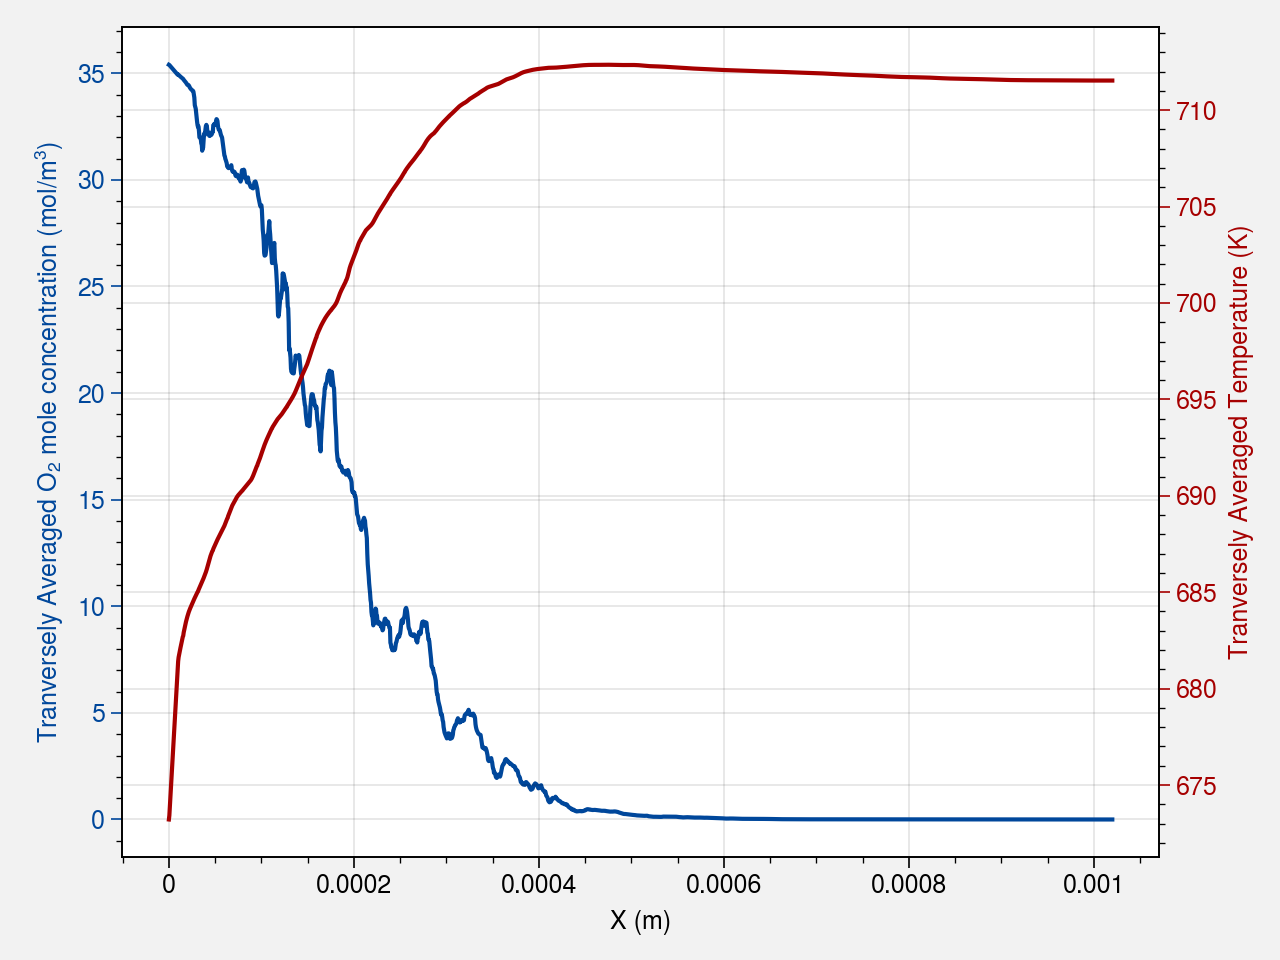

In [10]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"3.01")

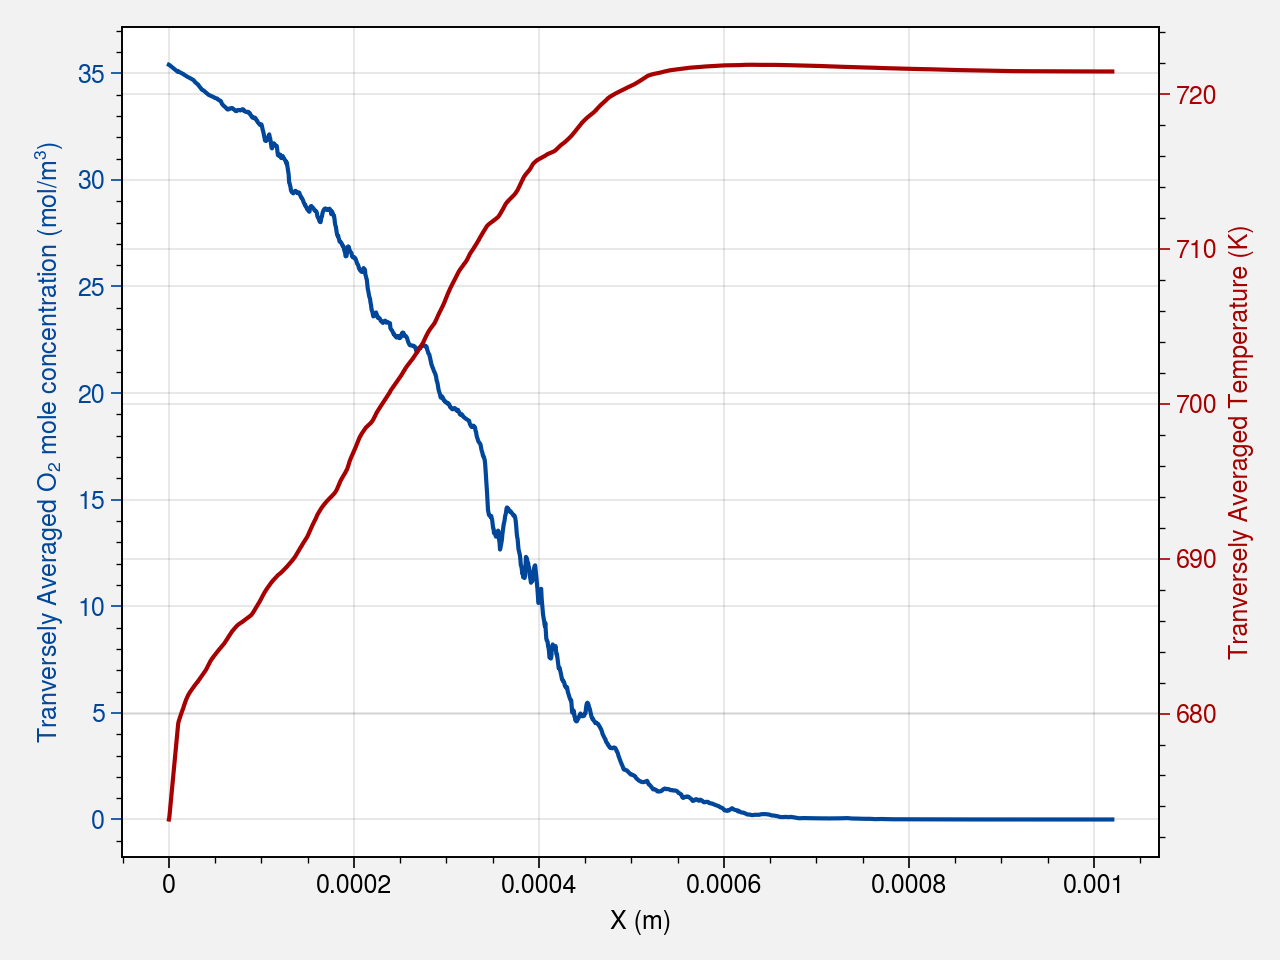

In [11]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"7.01")

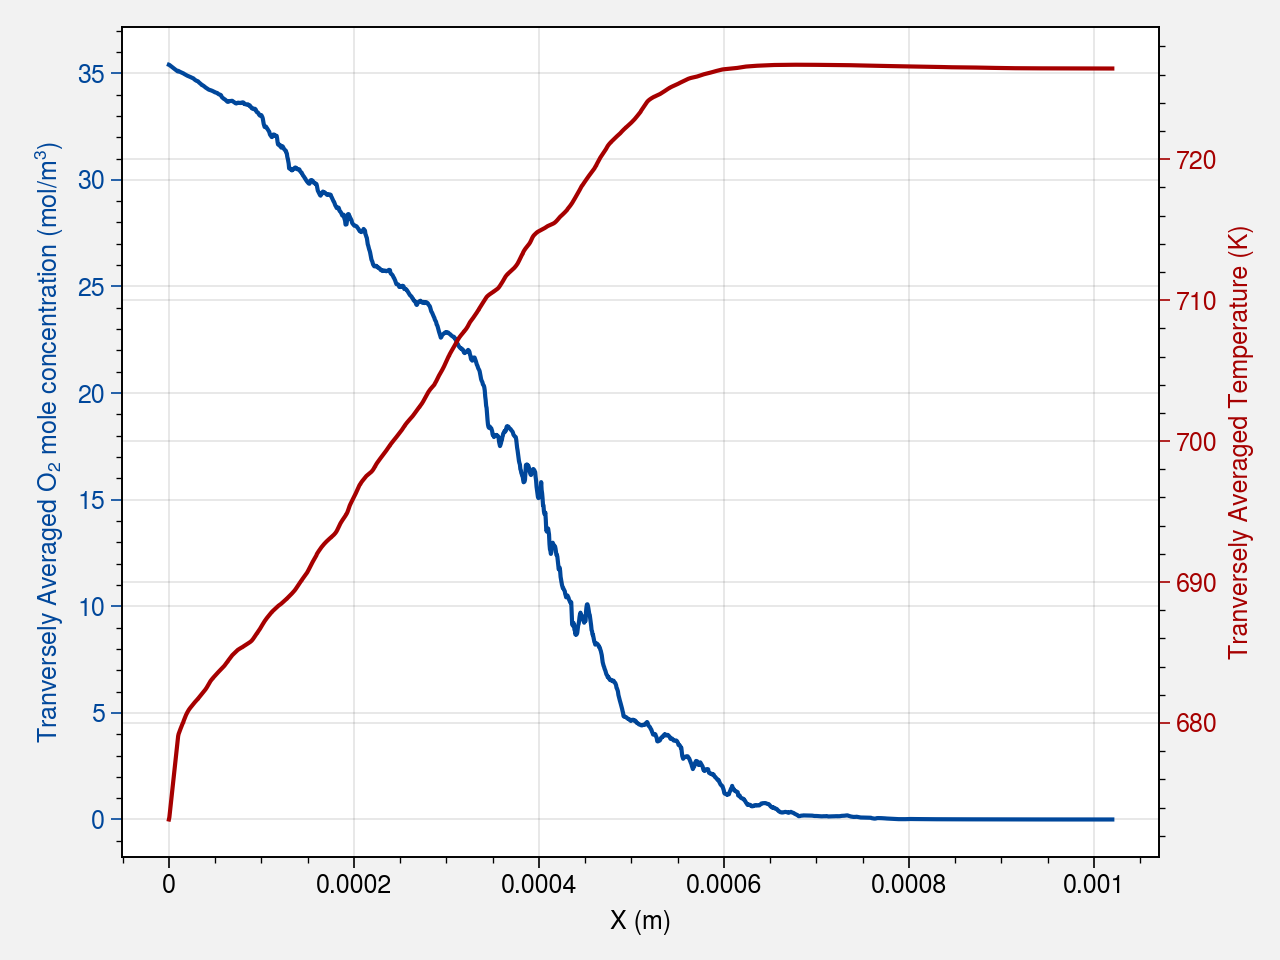

In [12]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"9.01")

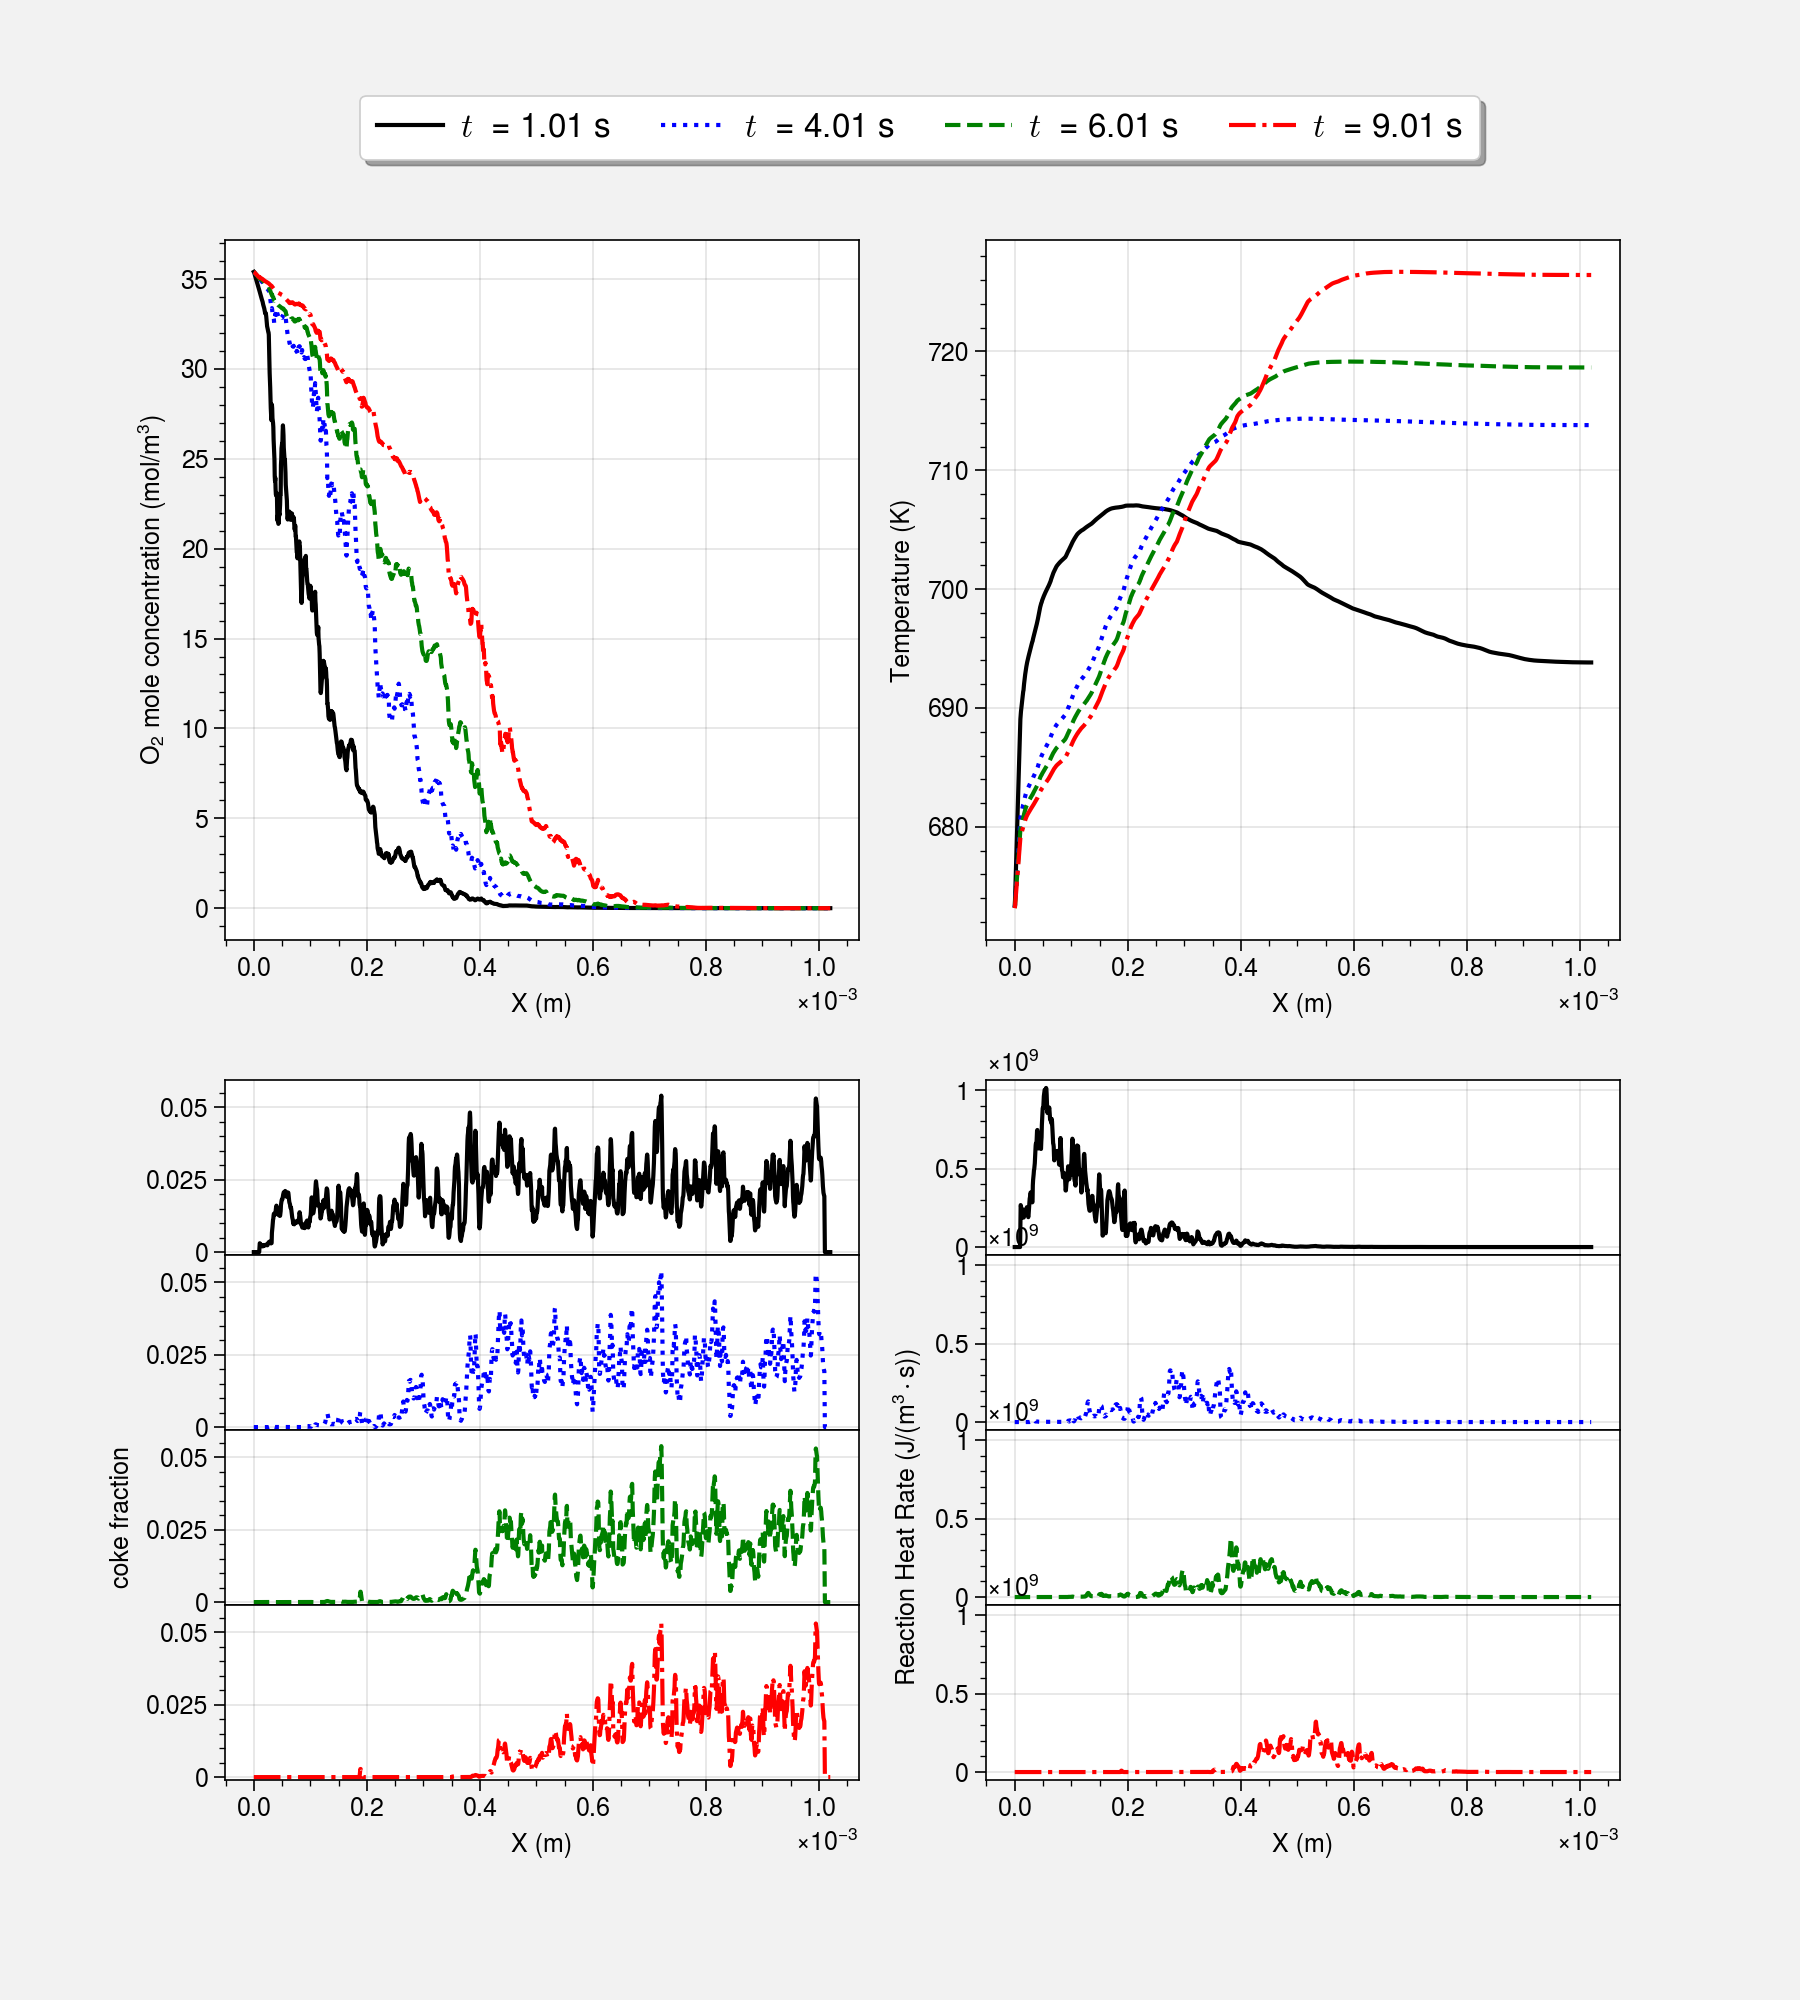

In [13]:
times=["1.01","4.01","6.01","9.01"]
fig=pyFigure.plot_transverse_averages_of_multiple_times(transverse_data_folder,times)


### Comments
1. This process is still controlled by the mass transfer.  The combustion temperature keep increasing with time like other cases with Pe of 1e-2

In [14]:
fig.savefig("transverselyAveragesOfMultipleTimeInstants.jpg",bbox_inches='tight')

## Show the reaction rate and burning rate

(-0.1, 4.5)

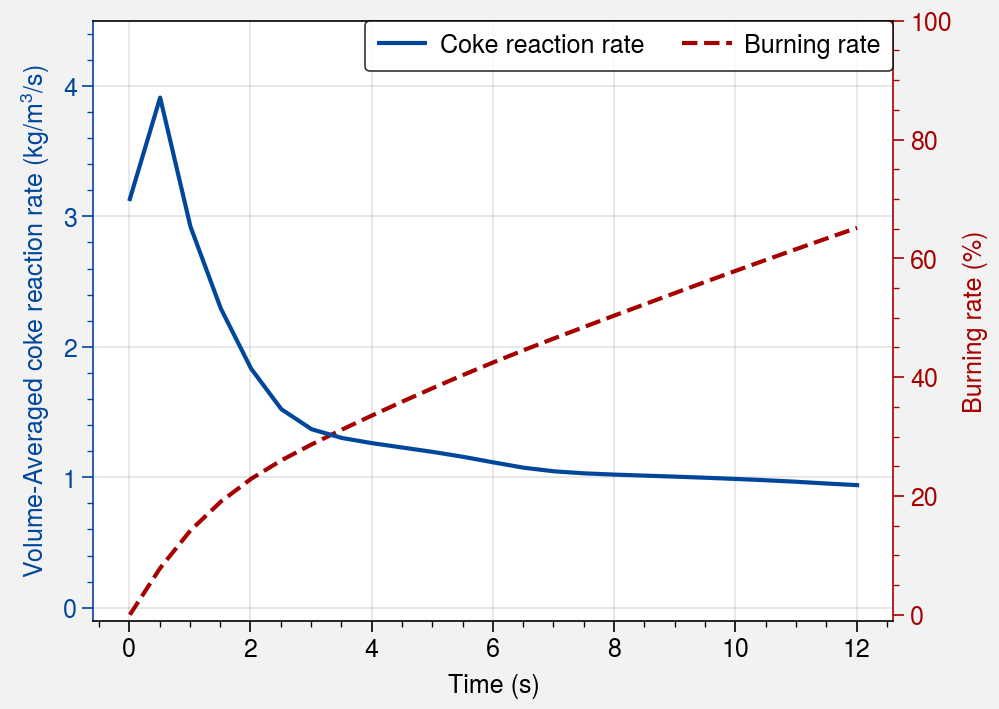

In [15]:
df_rate=pd.read_csv("../postProcess/others/ReactionRateAndBurningRate.csv")

ax1,ax2,fig=pyFigure.plot_reaction_rate_burning_rate(df_rate)
ax1.set_ylim([-0.1,4.5])

In [16]:
fig.savefig("ReactionRateAndBurningRate.jpg",bbox_inches='tight')

In [17]:

df_O2_flux_at_inlet=pd.read_csv("../postProcess/others/O2FluxsAtInlet.csv")

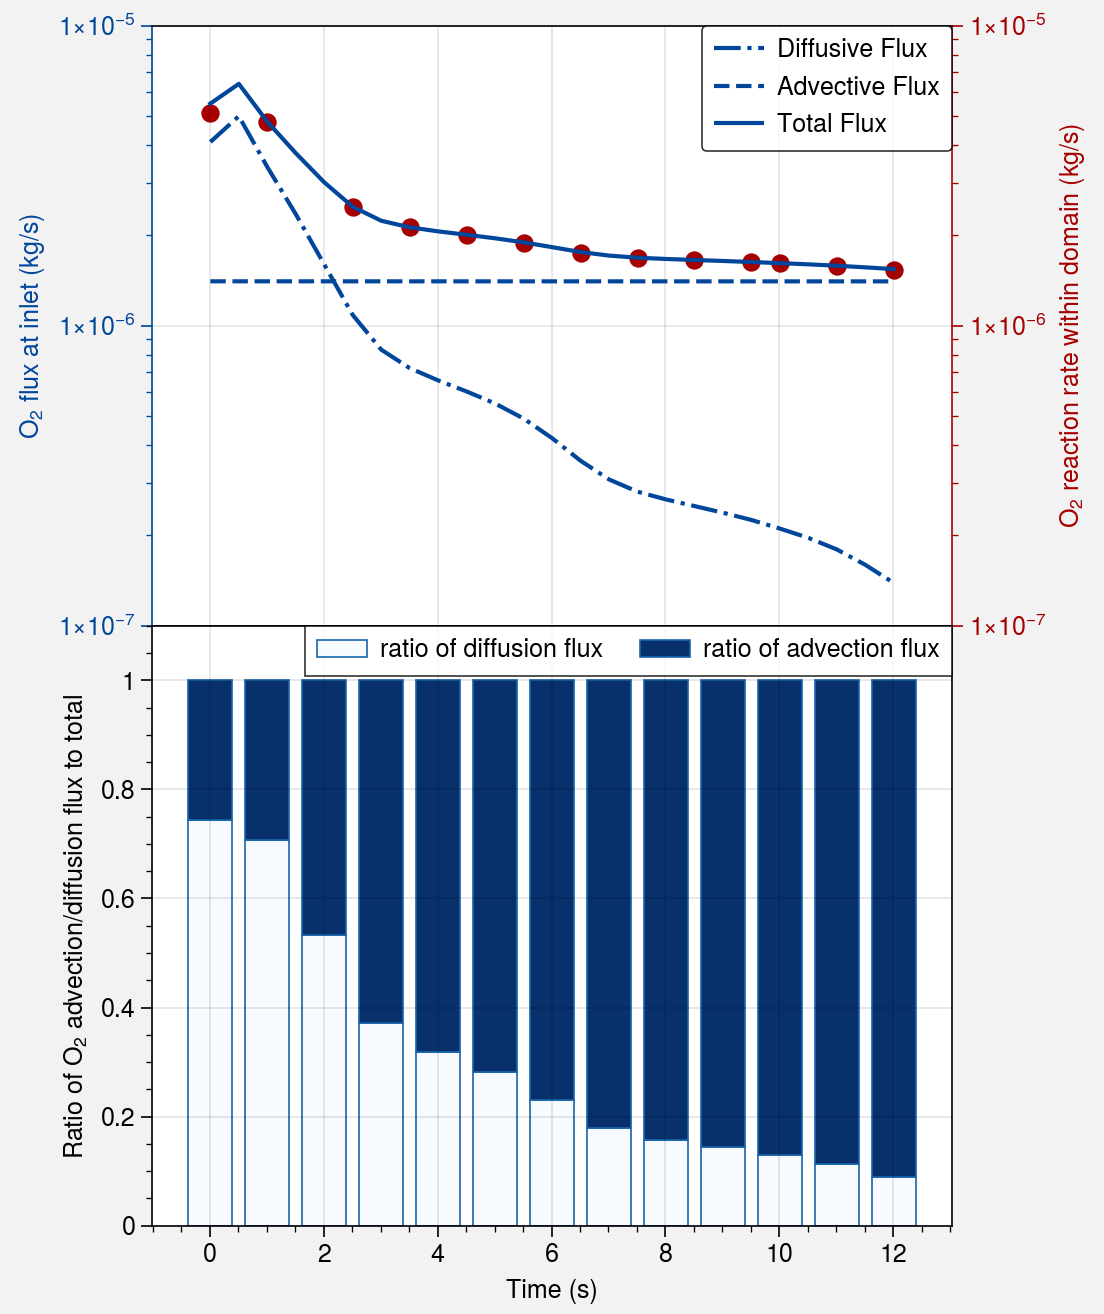

In [18]:
ax,ax2,fig=pyFigure.plot_O2_flux_reaction_rate(df_O2_flux_at_inlet,df_rate,pixelResolution,DO2,sampling_rate=2,ylim=(1e-7,1e-5))

### comments:
1. The processs is at the advection-dominated control regime espcially when the time is larger than 5s. 

In [19]:
fig.savefig("O2Flux_ReactionRate.jpg",bbox_inches='tight')

## Show the max temperature and O2 concentration at the outlet

In [20]:
df_combined=pyCompute.computeMaxTemperatureAndOutletO2ConcHistory(file_path,transverse_data_folder)

(-2.0, 32.0)

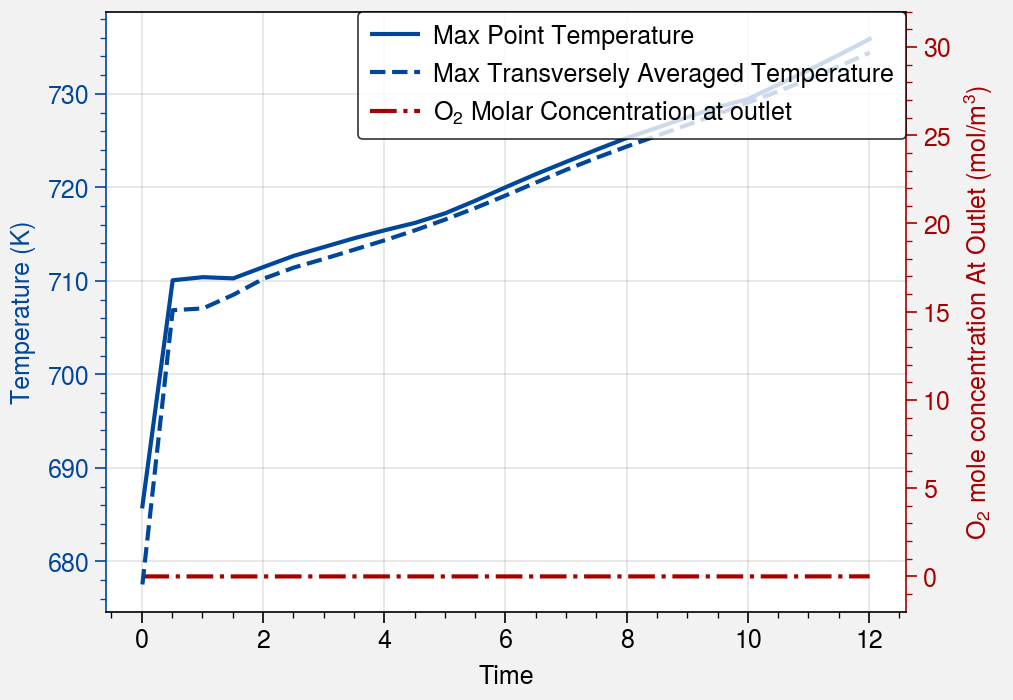

In [21]:
ax1,ax2,fig=pyFigure.Plot_MaxTemperature_OutletO2ConcHistory(df_combined)
ax2.set_ylim([-2,32])

In [22]:
fig.savefig("MaxTemperature_OutletO2ConcHistory.jpg",bbox_inches='tight')